##Day 26 - DIY Solution

**Q1. Problem Statement: Sampling Distribution-I**

Wine can be labeled as quality "7" and above only if the alcohol level is greater than 11.3%. If the level of alcohol is less, then the will won't taste sour enough; if the alcohol level is less than 11.3%, the wine might be bitter. The price difference between quality "7" & "8" wine and quality "5" & "6" wine will be as much as 125%. So the company needs to be very particular to maintain this standard. The quality control person is only allowed to open ten bottles of wine in quality "7" & "8" to ensure the levels are sufficient.
Load the winequality-red.csv data into a DataFrame and perform the following tasks:
1.	Pick up a sample of ten bottles from "7" and "8" quality using numpy.random() function
2.	Find out the mean and standard deviation of the sample
3.	Plot the alcohol content available in the sample using a distplot
4.	Calculate the standard error using formula - standard_error = s/np.sqrt(n), Where, s = standard deviation of the sample, and n = sample size


**Step-1:** Loading the dataset into a DataFrame.

In [11]:
import warnings as war
war.filterwarnings("ignore")

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Step-2:** Picking up 10 bottles as a sample from wine with "7" and "8" quality using numpy.random.seed() function. 

In [13]:
np.random.seed(11)
sample_7_and_above = data[data['quality'].isin([7, 8])].sample(10)[['alcohol']].reset_index().drop(columns = ['index'])
sample_7_and_above

,alcohol
0,12.0
1,12.5
2,11.7
3,14.0
4,12.7
5,12.1
6,11.0
7,10.0
8,10.8
9,9.7


**Step-3:** Finding the mean and standard deviation of the sample.

In [14]:
m = np.mean(sample_7_and_above["alcohol"])
print("The mean of the sample is: ", m)
sd = np.std(sample_7_and_above["alcohol"])
print("The standard deviation of the sample is: ", sd)

The mean of the sample is:  11.65
The standard deviation of the sample is:  1.2387493693237548


**Step-4:** Plotting alcohol levels of the given sample using the Seaborn library.

Text(0.5, 1.0, 'mean of sample 1 = 11.65, standard deviation ofsample 1 = 1.2387493693237548')

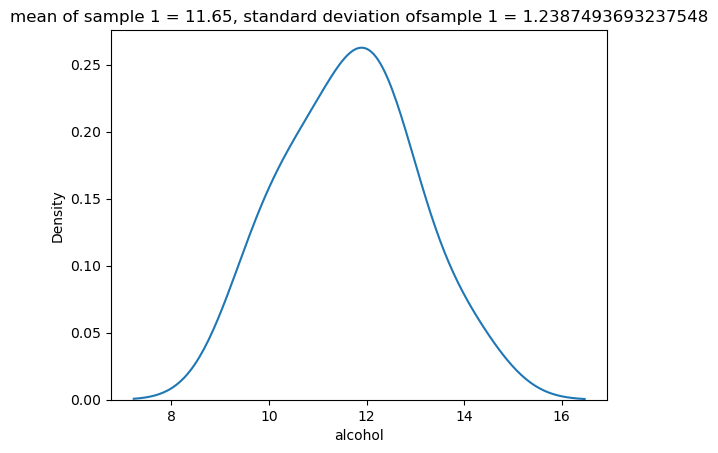

In [15]:
sns.distplot(sample_7_and_above["alcohol"], hist=False)
title = "mean of sample 1 = " + str(m) + ", standard deviation ofsample 1 = "+ str(sd)
plt.title(title)

**Step-5:** Calculating the standard error.

In [16]:
# calculating the Standard Error
n=10 # sample size
s= sd
standard_error = s/np.sqrt(n)
print('Standard Error is:',standard_error)

Standard Error is: 0.39172694571601785


**Q2. Problem Statement: Sampling Distribution-II**

**Note:** This problem is in continuation with the previous one.

Our goal was to get a mean of 11.3, but we got 11.65 for our samples. Since this is a sample and we do not expect it to be precisely 11.3, it is 11.65. Does this batch of the sample accurately reflect the alcohol content of the entire population? To answer these questions, perform the following tasks:
1.	Take nine samples of size ten each from the population and find the means and standard deviations of all the nine samples
2.	Plot the means of the sampling distribution
3.	Find the standard error of the sampling distribution


**Step-1:** Taking 9 samples each with a sample size 10, and calculating the means and standard deviations of all the 9 samples. 

In [20]:
seed = np.arange(0, 9)

x_bar = []
std_dev = []

for s in seed:
    np.random.seed(s)
    sample_7_and_above = data[data['quality'].isin([7, 8])].sample(10)[['alcohol']].reset_index().drop(columns = ['index'])
    x_bar.append(np.mean(sample_7_and_above["alcohol"]))
    std_dev.append(np.std(sample_7_and_above["alcohol"]))
    
samples = pd.DataFrame(columns = ["Sample Means (X_bar)", "Sample Standard Deviation (s)"], data= list(zip(x_bar, std_dev)))
samples

,Sample Means (X_bar),Sample Standard Deviation (s)
0,11.02,0.669029
1,11.14,0.971802
2,11.21,1.013361
3,11.63,0.888876
4,11.45,0.908020
5,11.24,0.935094
6,11.32,1.231909
7,11.39,0.773886
8,11.30,0.507937


**Step-2:** Plotting the means of the sample using the Seaborn library.

Text(0.5, 1.0, 'Distribution of the sample means')

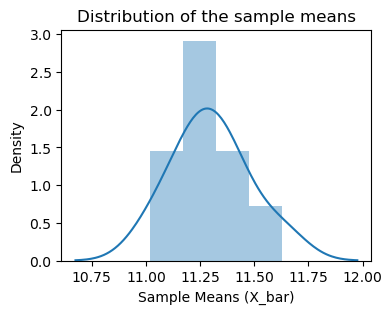

In [24]:
plt.figure(figsize=(4,3))
sns.distplot(samples["Sample Means (X_bar)"])
plt.title("Distribution of the sample means")

**Step-3:** Find the standard deviation of the means of the Samples/Sampling distribution.


In [26]:
# Lets find the Standard Deviation of the Sampling Distribution which is also the Standard Error of statistic distribution

standard_error = np.array(samples['Sample Means (X_bar)']).std()
print('The Standard Error is:',standard_error)

The Standard Error is: 0.16852299546352748
